In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,recall_score
import itertools
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

In [2]:
# 数据导入与查看
data = pd.read_csv("./cybersecurity_data.csv")

In [3]:
#初步查看数据
print(data.keys())

Index(['battVoltage', 'battTemp', 'battLevel', 'battLevelDiff',
       'binderTransaction', 'binderReply', 'binderAcquire', 'binderRelease',
       'binderActiveNodes', 'binderTotalNodes', 'binderActiveRef',
       'binderTotalRef', 'binderActiveDeath', 'binderTotalDeath',
       'binderActiveTransaction', 'binderTotalTransaction',
       'binderActiveTransactionComplete', 'binderTotalTransactionComplete',
       'binderTotalNodesDiff', 'binderTotalRefDiff', 'binderTotalDeathDiff',
       'binderTotalTransactionDiff', 'binderTotalTransactionCompleteDiff',
       'cpuUsage', 'memActive', 'memInactive', 'memMapped', 'memFreePages',
       'memAnonPages', 'memFilePages', 'memDirtyPages', 'memWritebackPages',
       'networkTotalTXPackets', 'networkTotalTXBytes', 'networkTotalRXPackets',
       'networkTotalRXBytes', 'networkTotalTXPacketsDiff',
       'networkTotalTXBytesDiff', 'networkTotalRXPacketsDiff',
       'networkTotalRXBytesDiff', 'permissions', 'class'],
      dtype='object')


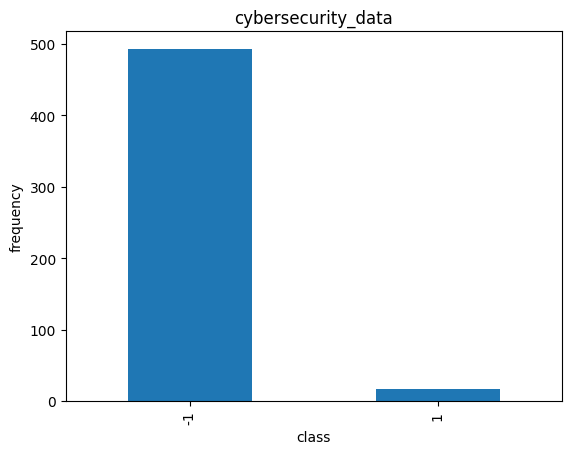

In [4]:
# 查看标签分布
count_classes = pd.value_counts(data['class'], sort=True).sort_index()
count_classes.plot(kind='bar')
plt.title("cybersecurity_data")
plt.xlabel("class")
plt.ylabel("frequency")
plt.show()

In [5]:
#数据标准化
data['battVoltage']=StandardScaler().fit_transform(data['battVoltage'].values.reshape(-1,1))
data['battTemp']=StandardScaler().fit_transform(data['battTemp'].values.reshape(-1,1))
data['battLevel']=StandardScaler().fit_transform(data['battLevel'].values.reshape(-1,1))
data['battLevelDiff']=StandardScaler().fit_transform(data['battLevelDiff'].values.reshape(-1,1))
data['binderTransaction']=StandardScaler().fit_transform(data['binderTransaction'].values.reshape(-1,1))
data['binderReply']=StandardScaler().fit_transform(data['binderReply'].values.reshape(-1,1))
data['binderAcquire']=StandardScaler().fit_transform(data['binderAcquire'].values.reshape(-1,1))
data['binderRelease']=StandardScaler().fit_transform(data['binderRelease'].values.reshape(-1,1))
data['binderActiveNodes']=StandardScaler().fit_transform(data['binderActiveNodes'].values.reshape(-1,1))
data['binderTotalNodes']=StandardScaler().fit_transform(data['binderTotalNodes'].values.reshape(-1,1))
data['binderActiveRef']=StandardScaler().fit_transform(data['binderActiveRef'].values.reshape(-1,1))
data['binderTotalRef']=StandardScaler().fit_transform(data['binderTotalRef'].values.reshape(-1,1))
data['binderActiveDeath']=StandardScaler().fit_transform(data['binderActiveDeath'].values.reshape(-1,1))
data['binderTotalDeath']=StandardScaler().fit_transform(data['binderTotalDeath'].values.reshape(-1,1))
data['binderActiveTransaction']=StandardScaler().fit_transform(data['binderActiveTransaction'].values.reshape(-1,1))
data['binderTotalTransaction']=StandardScaler().fit_transform(data['binderTotalTransaction'].values.reshape(-1,1))
data['binderActiveTransactionComplete']=StandardScaler().fit_transform(data['binderActiveTransactionComplete'].values.reshape(-1,1))
data['binderTotalTransactionComplete']=StandardScaler().fit_transform(data['binderTotalTransactionComplete'].values.reshape(-1,1))
data['binderTotalNodesDiff']=StandardScaler().fit_transform(data['binderTotalNodesDiff'].values.reshape(-1,1))
data['binderTotalRefDiff']=StandardScaler().fit_transform(data['binderTotalRefDiff'].values.reshape(-1,1))
data['binderTotalDeathDiff']=StandardScaler().fit_transform(data['binderTotalDeathDiff'].values.reshape(-1,1))
data['binderTotalTransactionDiff']=StandardScaler().fit_transform(data['binderTotalTransactionDiff'].values.reshape(-1,1))
data['binderTotalTransactionCompleteDiff']=StandardScaler().fit_transform(data['binderTotalTransactionCompleteDiff'].values.reshape(-1,1))
data['cpuUsage']=StandardScaler().fit_transform(data['cpuUsage'].values.reshape(-1,1))
data['memActive']=StandardScaler().fit_transform(data['memActive'].values.reshape(-1,1))
data['memInactive']=StandardScaler().fit_transform(data['memInactive'].values.reshape(-1,1))
data['memMapped']=StandardScaler().fit_transform(data['memMapped'].values.reshape(-1,1))
data['memFreePages']=StandardScaler().fit_transform(data['memFreePages'].values.reshape(-1,1))
data['memAnonPages']=StandardScaler().fit_transform(data['memAnonPages'].values.reshape(-1,1))
data['memFilePages']=StandardScaler().fit_transform(data['memFilePages'].values.reshape(-1,1))
data['memDirtyPages']=StandardScaler().fit_transform(data['memDirtyPages'].values.reshape(-1,1))
data['memWritebackPages']=StandardScaler().fit_transform(data['memWritebackPages'].values.reshape(-1,1))
data['networkTotalTXPackets']=StandardScaler().fit_transform(data['networkTotalTXPackets'].values.reshape(-1,1))
data['networkTotalTXBytes']=StandardScaler().fit_transform(data['networkTotalTXBytes'].values.reshape(-1,1))
data['networkTotalRXPackets']=StandardScaler().fit_transform(data['networkTotalRXPackets'].values.reshape(-1,1))
data['networkTotalRXBytes']=StandardScaler().fit_transform(data['networkTotalRXBytes'].values.reshape(-1,1))
data['networkTotalTXPacketsDiff']=StandardScaler().fit_transform(data['networkTotalTXPacketsDiff'].values.reshape(-1,1))
data['networkTotalTXBytesDiff']=StandardScaler().fit_transform(data['networkTotalTXBytesDiff'].values.reshape(-1,1))
data['networkTotalTXBytesDiff']=StandardScaler().fit_transform(data['networkTotalTXBytesDiff'].values.reshape(-1,1))
data['networkTotalRXPacketsDiff']=StandardScaler().fit_transform(data['networkTotalRXPacketsDiff'].values.reshape(-1,1))
data['networkTotalRXBytesDiff']=StandardScaler().fit_transform(data['networkTotalRXBytesDiff'].values.reshape(-1,1))
data['permissions']=StandardScaler().fit_transform(data['permissions'].values.reshape(-1,1))

In [6]:
X = data.iloc[:, data.columns != 'class']
y = data.iloc[:, data.columns == 'class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#上采样
oversampler=SMOTE(random_state=0)
X_train,y_train=oversampler.fit_resample(X_train,y_train)

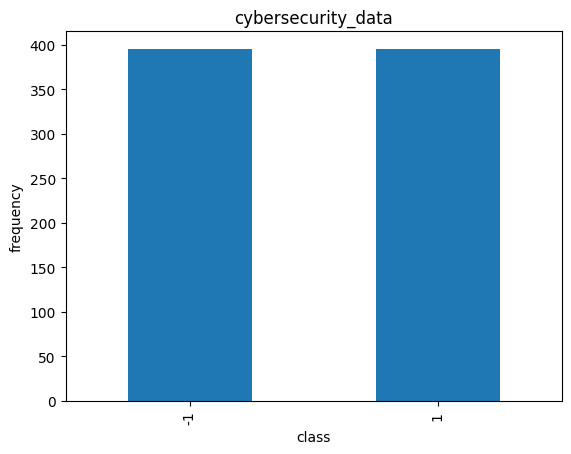

In [8]:
# 查看标签分布
count_classes = pd.value_counts(y_train['class'], sort=True).sort_index()
count_classes.plot(kind='bar')
plt.title("cybersecurity_data")
plt.xlabel("class")
plt.ylabel("frequency")
plt.show()

In [9]:
#进一步查看感兴趣的数据
X_train.describe()

,battVoltage,battTemp,battLevel,battLevelDiff,binderTransaction,binderReply,binderAcquire,binderRelease,binderActiveNodes,binderTotalNodes,...,memWritebackPages,networkTotalTXPackets,networkTotalTXBytes,networkTotalRXPackets,networkTotalRXBytes,networkTotalTXPacketsDiff,networkTotalTXBytesDiff,networkTotalRXPacketsDiff,networkTotalRXBytesDiff,permissions
count,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,...,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000,790.000000
mean,-0.708710,0.337663,-0.701862,0.158189,0.377622,0.425317,0.314501,0.289234,0.533862,0.309545,...,-0.017560,0.154748,0.039786,0.236276,0.236385,-0.089202,-0.051848,-0.083974,-0.077426,0.048192
std,1.055030,0.795565,1.167334,1.273812,1.207099,1.228581,1.135104,1.134466,1.189822,1.141169,...,0.804202,1.023449,0.946833,1.058137,1.042198,0.774953,0.786540,0.733744,0.735420,0.738423
min,-2.528155,-1.403113,-2.092841,-8.553574,-1.326938,-1.257235,-1.587122,-1.805179,-2.437751,-1.708008,...,-0.047358,-1.302743,-1.298941,-1.214482,-1.162078,-0.247237,-0.299064,-0.200999,-0.167473,-1.060301
25%,-1.457986,-0.366780,-2.092841,-0.016739,-0.954260,-0.908837,-0.918210,-0.966474,-0.475981,-0.923895,...,-0.047358,-1.116395,-1.102738,-1.048716,-1.067867,-0.247237,-0.299064,-0.200999,-0.167473,-0.518355
50%,-1.457986,0.669552,-0.255752,-0.016739,0.464604,0.366683,0.335358,0.477789,0.251584,0.359494,...,-0.047358,0.704827,0.598991,0.618810,0.661179,-0.247237,-0.299064,-0.200999,-0.167473,0.240369
75%,0.487776,0.669552,-0.255752,-0.016739,1.627811,1.733048,1.422003,1.384658,1.572777,1.422866,...,-0.047358,0.969339,0.648839,1.169003,1.147989,-0.186082,-0.193112,-0.168266,-0.162341,0.457147
max,0.974216,1.705884,1.581338,8.520096,2.188662,2.243317,2.420967,2.272000,3.390970,2.375445,...,22.547155,1.775826,2.165429,1.721380,1.600471,11.536112,7.805600,10.351365,10.843600,4.142380


In [10]:
X_train = np.array(X_train,type(float))

In [11]:
#去离群值
X_train [:,0]=np.minimum(X_train[:,0],0.7)
X_train [:,1]=np.minimum(X_train[:,1],1.5)
# X_train [:,2]=np.minimum(X_train[:,2],22.2)
X_train [:,3]=np.minimum(X_train[:,3],2.5)
# X_train [:,4]=np.minimum(X_train[:,4],2)
# X_train [:,5]=np.minimum(X_train[:,5],20)
# X_train [:,6]=np.minimum(X_train[:,6],22)
X_train [:,7]=np.minimum(X_train[:,7],2)
X_train [:,8]=np.minimum(X_train[:,8],2.5)
X_train [:,9]=np.minimum(X_train[:,9],2)
X_train [:,10]=np.minimum(X_train[:,10],2)
X_train [:,11]=np.minimum(X_train[:,11],1.5)
X_train [:,12]=np.minimum(X_train[:,12],2)
# X_train [:,13]=np.minimum(X_train[:,13],2)
# X_train [:,14]=np.minimum(X_train[:,14],2)
X_train [:,15]=np.minimum(X_train[:,15],3)
X_train [:,16]=np.minimum(X_train[:,16],3)
X_train [:,17]=np.minimum(X_train[:,17],3)
X_train [:,18]=np.minimum(X_train[:,18],3)
X_train [:,19]=np.minimum(X_train[:,19],2)

In [12]:
bag_clf=BaggingClassifier(SVC(),n_estimators=10,bootstrap=True,max_samples=0.5)

bag_clf.fit(X_train,y_train)
y_pred=bag_clf.predict(X_test)
print(y_pred)

cm = confusion_matrix(y_test, y_pred)
TP = cm[0][0] 
FN = cm[0][1] 
FP = cm[1][0] 
TN = cm[1][1]
acc = (TP + TN) / (TP + FN + FP + TN)
print(bag_clf.__class__.__name__,'准确率=',acc)
sensitivity = TP / (TP + FN)
print(bag_clf.__class__.__name__,'sensitivity=',sensitivity)
specificity = TN / (TN + FP)
print(bag_clf.__class__.__name__,'specificity=',specificity)
precision=TP/(TP+FP)
print(bag_clf.__class__.__name__,'precision=',precision)
F1_score=2*precision*sensitivity/(precision+sensitivity)
print(bag_clf.__class__.__name__,'F1_score=',F1_score)
print(classification_report(y_test,y_pred ))

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]
BaggingClassifier 准确率= 0.9803921568627451
BaggingClassifier sensitivity= 1.0
BaggingClassifier specificity= 0.5
BaggingClassifier precision= 0.98
BaggingClassifier F1_score= 0.98989898989899
              precision    recall  f1-score   support

          -1       0.98      1.00      0.99        98
           1       1.00      0.50      0.67         4

    accuracy                           0.98       102
   macro avg       0.99      0.75      0.83       102
weighted avg       0.98      0.98      0.98       102



C:\Users\20450\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\20450\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


<Figure size 640x480 with 0 Axes>

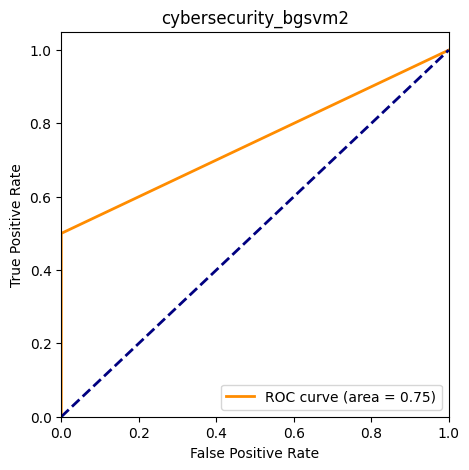

In [13]:
#ROC曲线
# 计算
fpr, tpr, thread = roc_curve(y_test, y_pred)
roc_auc= auc(fpr, tpr)
# 绘图
plt.figure()
lw = 2
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('cybersecurity_bgsvm2')
plt.legend(loc="lower right")
plt.show()